In [1]:
!pip3 install numpy
!pip install pandas
!pip show pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Name: pip
Version: 22.0.4
Summary: The PyPA recommended tool for installing Python packages.
Home-page: https://pip.pypa.io/
Author: The pip developers
Author-email: distutils-sig@python.org
License: MIT
Location: /usr/local/lib/python3.8/dist-packages
Requires: 
Required-by: fastai, fastcore, pip-tools


In [8]:
# importing important libraries
import os                  # Easy to create, read, delete from a file system
import cv2                 # openCV library for basic image read, write operations
import numpy as np         # numpy for matrix operations and other numerical stps
import matplotlib.pyplot as plt         # for plotting images and graphs

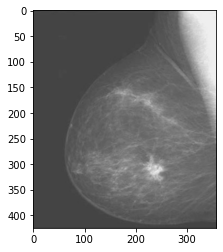

In [9]:
img = cv2.imread('Mammogram.png')  # reads image in BGR format

plt.imshow(img)  #displaying as it is

True

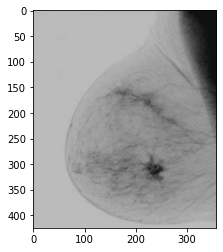

In [15]:
# 5.1 - Negative image

# cv2 has a convenient function to compute the negative image
# we can do so by using cv2.bitwise_not()
negative_img = cv2.bitwise_not(img)

# displaying the negative image and saving it
plt.imshow(negative_img)  
cv2.imwrite('Negative_Mammogram.png', negative_img)

True

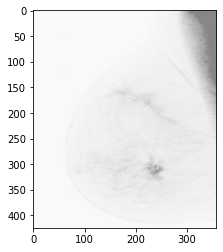

In [16]:
# 5.2 - Log transformation on negative image

# Applying log transformation to the negative image
c = 255 / np.log(1 + np.max(negative_img))
log_neg_img = c * (np.log(negative_img + 1))
   
# The data type is specificd to convert float value to int
log_neg_img = np.array(log_neg_img, dtype = np.uint8)

# displaying the log transformation of the negative image and saving it
plt.imshow(log_neg_img)  
cv2.imwrite('Log_Negative_Mammogram.png', log_neg_img)

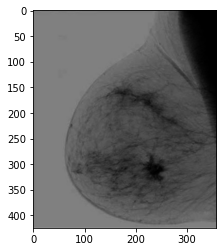

In [29]:
# 5.3 - Power-Law transformation to the negative image

# Trying 4 gamma values
# Choosing different gamma values for testing
gamma = [0.1, 0.2, 0.5, 1.1, 2.2]
for g in gamma:
    # applying correction
    powerLaw_neg_img = np.array(255*(negative_img / 255) ** g, dtype = 'uint8')
    # displaying the power-law transformation of the negative image and saving it
    cv2.imwrite('powerLaw_neg_img'+str(g)+'.png', powerLaw_neg_img)

# displaying the result for gamma = 2.2
plt.imshow(powerLaw_neg_img)

True

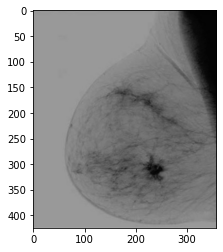

In [43]:
# 5.4 - Piecewise linear transform

# Function to map each intensity level to an output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2
  

# Since r_min is the minimum intensity value of the input (grayscale) image
r_min = np.amin(img)
s_min = np.amin(negative_img)
# Similarly, r_max will be 
r_max = np.amax(img)
s_max = np.amax(negative_img)

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
  
# Applying the piecewise linear transformation for the contrast sketch.
linear_neg_img = pixelVal_vec(negative_img, r_min, s_min, r_max, s_max)
  
# displaying the result and saving it
plt.imshow(linear_neg_img.astype('uint8'))
cv2.imwrite('Linear_Negative_Mammogram.png', linear_neg_img)